In [2]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles and non-vehicles
images = glob.glob('*.jpeg')
cars = []
notcars = []

# for image in images:
#     if 'image' in image or 'extra' in image:
#         notcars.append(image)
#     else:
#         cars.append(image)


cars = [
    'vehicles/GTI_Right/image0940.png',
    'vehicles/GTI_Right/image0941.png',
    'vehicles/GTI_Right/image0942.png',
    ]
notcars = [
    'non-vehicles/GTI/image970.png',
    'non-vehicles/GTI/image971.png',
    'non-vehicles/GTI/image972.png',
]

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    return hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False,
                                  visualise=vis, feature_vector=feature_vec)
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False,
                       visualise=False, feature_vector=feature_vec)
        return features

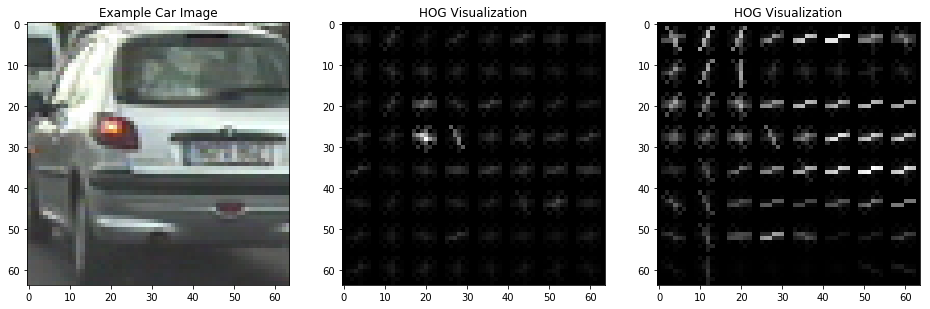

In [13]:
c = cars[2]

img = mpimg.imread(c)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

features, hog_image = get_hog_features(hsv[:,:,1], orient,
                        pix_per_cell, cell_per_block,
                        vis=True, feature_vec=False)

features, hog_image2 = get_hog_features(gray, orient,
                        pix_per_cell, cell_per_block,
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure(figsize=(16, 12))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Example Car Image')

plt.subplot(132)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

plt.subplot(133)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Visualization')